# Bài toán dự đoán nhiệt độ sử dụng thuật toán HMM phi tuyến sử dụng bộ lọc Particle cải tiến
Link data: https://rp5.ru/Weather_archive_in_Ha_Noi_(airport),_METAR

## Import thư viện

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Đọc dữ liệu

In [130]:
df = df = pd.read_csv('./weather.csv', sep=';', engine='python')
df

,"(airport)""",T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13
0,13.05.2025 13:30,31.0,755.9,756.9,52.0,Wind blowing from the east-southeast,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,20.0,NaN
1,13.05.2025 13:00,31.0,756.7,757.7,52.0,Wind blowing from the east,4,NaN,NaN,NaN,Few clouds (10-30%) 1440 m,10.0 and more,20.0,NaN
2,13.05.2025 12:30,30.0,757.2,758.2,55.0,Wind blowing from the east-southeast,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,20.0,NaN
3,13.05.2025 12:00,30.0,757.2,758.2,49.0,Wind blowing from the south-east,4,NaN,NaN,NaN,No Significant Clouds,10.0 and more,18.0,NaN
4,13.05.2025 11:30,30.0,757.2,758.2,49.0,Wind blowing from the east-southeast,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,13.05.2024 03:00,24.0,757.2,758.2,94.0,Wind blowing from the west,5,NaN,Light rain,NaN,"Few clouds (10-30%) 150 m, broken clouds (60-9...",10.0 and more,23.0,NaN
17380,13.05.2024 02:30,23.0,757.2,758.2,100.0,Wind blowing from the north-northwest,2,NaN,Light rain,NaN,"Few clouds (10-30%) 630 m, scattered clouds (4...",10.0 and more,23.0,NaN
17381,13.05.2024 02:00,23.0,757.2,758.2,94.0,Wind blowing from the west-northwest,3,NaN,Rain,NaN,"Few clouds (10-30%) 810 m, cumulus congestus o...",9.0,22.0,NaN
17382,13.05.2024 00:30,23.0,758.6,759.7,94.0,Wind blowing from the north-northwest,4,NaN,"Thunderstorm, rain",NaN,"Scattered clouds (40-50%) 600 m, few clouds (1...",5.0,22.0,NaN


In [131]:
df.dtypes


(airport)"      object
T              float64
P0             float64
P              float64
U              float64
DD              object
Ff               int64
ff10           float64
WW              object
W'W'           float64
c               object
VV              object
Td             float64
Unnamed: 13    float64
dtype: object

In [132]:
# Đếm số lượng giá trị không rỗng trong mỗi cột
print('Thống kê số dữ liệu:')
print(df.count())

Thống kê số dữ liệu:
(airport)"     17384
T              17383
P0             17383
P              17384
U              17383
DD             17384
Ff             17384
ff10              39
WW              4425
W'W'               0
c              17384
VV             17381
Td             17383
Unnamed: 13        0
dtype: int64


In [133]:
# Xóa cột ff10, Unnamed: 13, cột W'W', cột WW
df = df.drop(columns=["Unnamed: 13","W'W'","ff10","WW"])

In [134]:
df.dropna()

,"(airport)""",T,P0,P,U,DD,Ff,c,VV,Td
0,13.05.2025 13:30,31.0,755.9,756.9,52.0,Wind blowing from the east-southeast,3,No Significant Clouds,10.0 and more,20.0
1,13.05.2025 13:00,31.0,756.7,757.7,52.0,Wind blowing from the east,4,Few clouds (10-30%) 1440 m,10.0 and more,20.0
2,13.05.2025 12:30,30.0,757.2,758.2,55.0,Wind blowing from the east-southeast,3,No Significant Clouds,10.0 and more,20.0
3,13.05.2025 12:00,30.0,757.2,758.2,49.0,Wind blowing from the south-east,4,No Significant Clouds,10.0 and more,18.0
4,13.05.2025 11:30,30.0,757.2,758.2,49.0,Wind blowing from the east-southeast,3,No Significant Clouds,10.0 and more,18.0
...,...,...,...,...,...,...,...,...,...,...
17379,13.05.2024 03:00,24.0,757.2,758.2,94.0,Wind blowing from the west,5,"Few clouds (10-30%) 150 m, broken clouds (60-9...",10.0 and more,23.0
17380,13.05.2024 02:30,23.0,757.2,758.2,100.0,Wind blowing from the north-northwest,2,"Few clouds (10-30%) 630 m, scattered clouds (4...",10.0 and more,23.0
17381,13.05.2024 02:00,23.0,757.2,758.2,94.0,Wind blowing from the west-northwest,3,"Few clouds (10-30%) 810 m, cumulus congestus o...",9.0,22.0
17382,13.05.2024 00:30,23.0,758.6,759.7,94.0,Wind blowing from the north-northwest,4,"Scattered clouds (40-50%) 600 m, few clouds (1...",5.0,22.0


In [135]:
print('Danh sách cột dữ liệu trong data: ')
df.columns.values

Danh sách cột dữ liệu trong data: 


array(['(airport)"', 'T', 'P0', 'P', 'U', 'DD', 'Ff', 'c', 'VV', 'Td'],
      dtype=object)

Các cột được mô tả như sau:

- '(airport)"': Đây là cột chứa thông tin về ngày và thời gian trong ngày của dữ liệu thời tiết.

- 'T': Cột này chứa dữ liệu về nhiệt độ trong dữ liệu thời tiết.

- 'P0': Cột này có thể chứa dữ liệu về áp suất không khí.

- 'P': Cột này có thể chứa dữ liệu về áp suất không khí thực tế (hay áp suất thực tế) tại địa điểm và thời gian cụ thể.

- 'U': Cột này chứa dữ liệu về độ ẩm tương đối của không khí tại thời điểm và địa điểm cụ thể.

- 'DD': Cột này có thể chứa dữ liệu về hướng gió tại thời điểm và địa điểm cụ thể.

- 'Ff': Cột này có thể chứa dữ liệu về tốc độ gió tại thời điểm và địa điểm cụ thể.

- 'c': Cột này có thể chứa dữ liệu về đám mây tại thời điểm và địa điểm cụ thể.

- 'VV': Cột này có thể chứa dữ liệu về tầm nhìn xa (khoảng cách mà một người có thể nhìn được) tại thời điểm và địa điểm cụ thể.

- 'Td': Cột này có thể chứa dữ liệu về điểm sương (điểm nơi hơi nước trong không khí bắt đầu ngưng tụ thành nước) tại thời điểm và địa điểm cụ thể.

In [136]:
df['(airport)"'] = pd.to_datetime(df['(airport)"'], dayfirst=True, errors='coerce')


In [137]:
# Đảm bảo cột là kiểu chuỗi datetime
df['(airport)"'] = pd.to_datetime(df['(airport)"'], errors='coerce')

# Tách thành 2 cột
df['date'] = df['(airport)"'].dt.date
df['time'] = df['(airport)"'].dt.time


In [138]:
cols = [ 'T', 'P0', 'P', 'U', 'DD', 'Ff', 'c', 'VV', 'Td']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [139]:
# 👉 Xử lý NaN bằng nội suy + loại bỏ NaN còn sót lại
df[['T', 'U']] = df[['T', 'U']].interpolate().fillna(method='bfill').fillna(method='ffill')
df = df.dropna(subset=['T', 'U'])  # Loại bỏ dòng vẫn còn thiếu nếu có

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2164\3245730735.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['T', 'U']] = df[['T', 'U']].interpolate().fillna(method='bfill').fillna(method='ffill')


In [140]:
class ImprovedParticleFilter:
    def __init__(self, N, state_dim, obs_func, transition_func):
        self.N = N
        self.state_dim = state_dim
        self.particles = np.random.randn(N, state_dim)
        self.weights = np.ones(N) / N
        self.obs_func = obs_func
        self.transition_func = transition_func

    def predict(self):
        self.particles = self.transition_func(self.particles)

    def update(self, observation):
        for i, particle in enumerate(self.particles):
            expected_obs = self.obs_func(particle)
            error = observation - expected_obs
            self.weights[i] = np.exp(-0.5 * np.sum(error**2))  # Gaussian likelihood

        self.weights += 1e-300  # Tránh chia cho 0
        self.weights /= np.sum(self.weights)

    def resample(self):
        indices = np.random.choice(self.N, size=self.N, p=self.weights)
        self.particles = self.particles[indices]
        self.weights = np.ones(self.N) / self.N

    def estimate(self):
        return np.average(self.particles, axis=0, weights=self.weights)


In [141]:
# Hàm chuyển trạng thái có thêm nhiễu phi tuyến
def transition_func(particles):
    noise = np.random.normal(0, 0.3, particles.shape)
    trend = np.array([[0.01, 0.02]])  # xu hướng nhẹ (ví dụ)
    return particles + noise + trend

# Hàm quan sát: quan sát nhiệt độ + độ ẩm
def obs_func(state):
    T, U = state
    return np.array([T + 0.5*U, T - 0.3*U])


In [142]:
# Chuẩn bị dữ liệu quan sát từ nhiệt độ và độ ẩm
observations = np.vstack([df['T'] + 0.5*df['U'], df['T'] - 0.3*df['U']]).T
true_states = np.vstack([df['T'], df['U']]).T

# Khởi tạo bộ lọc
pf = ImprovedParticleFilter(
    N=1000,
    state_dim=2,
    obs_func=obs_func,
    transition_func=transition_func
)

# Dự đoán và lưu kết quả
estimated_states = []

for obs in observations:
    pf.predict()
    pf.update(obs)
    pf.resample()
    est = pf.estimate()
    estimated_states.append(est)

estimated_states = np.array(estimated_states)


In [143]:
def evaluate_estimation(true_states, estimated_states):
    T_true = true_states[:, 0]
    T_est = estimated_states[:, 0]
    U_true = true_states[:, 1]
    U_est = estimated_states[:, 1]

    mae_T = mean_absolute_error(T_true, T_est)
    rmse_T = np.sqrt(mean_squared_error(T_true, T_est))

    mae_U = mean_absolute_error(U_true, U_est)
    rmse_U = np.sqrt(mean_squared_error(U_true, U_est))

    print("📊 Evaluation Metrics:")
    print(f"Temperature - MAE: {mae_T:.3f}, RMSE: {rmse_T:.3f}")
    print(f"Humidity    - MAE: {mae_U:.3f}, RMSE: {rmse_U:.3f}")

# Gọi hàm đánh giá
evaluate_estimation(true_states, estimated_states)


📊 Evaluation Metrics:
Temperature - MAE: 1.901, RMSE: 4.693
Humidity    - MAE: 10.235, RMSE: 16.633


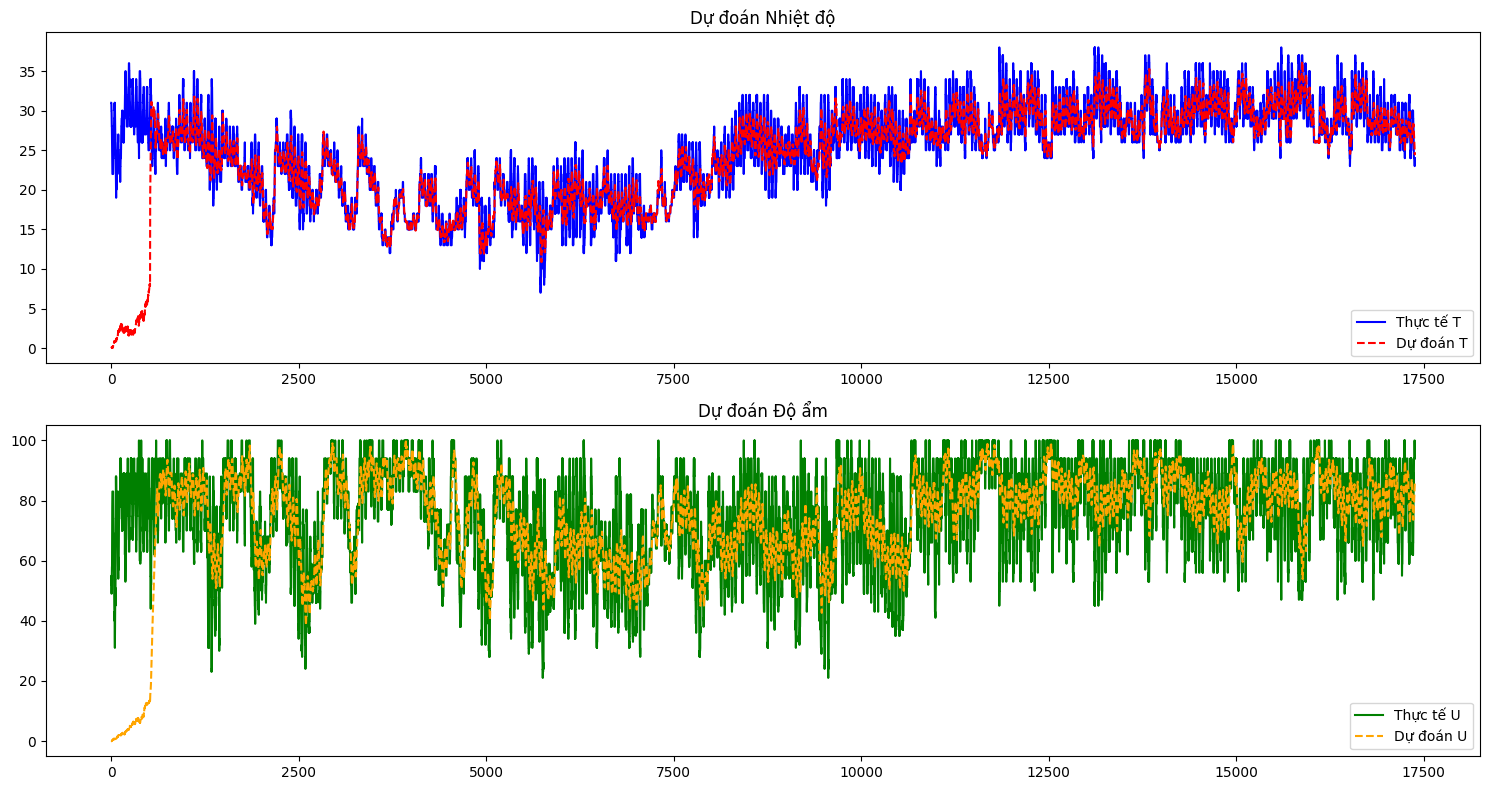

In [144]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Nhiệt độ
axes[0].plot(true_states[:, 0], label='Thực tế T', color='blue')
axes[0].plot(estimated_states[:, 0], label='Dự đoán T', color='red', linestyle='--')
axes[0].set_title('Dự đoán Nhiệt độ')
axes[0].legend()

# Độ ẩm
axes[1].plot(true_states[:, 1], label='Thực tế U', color='green')
axes[1].plot(estimated_states[:, 1], label='Dự đoán U', color='orange', linestyle='--')
axes[1].set_title('Dự đoán Độ ẩm')
axes[1].legend()

plt.tight_layout()
plt.show()
